In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import scipy.constants as sc

In [2]:
Data = {}

In [3]:
Data["Air"] = np.array([0, 0, 0])
Data["Delrin"] = np.array([435.75, 618.5,620]) #170.75
Data["Nylon"] = np.array([246, 245, 241.75]) #162
Data["Teflon"] = np.array([90,278,252])#162
Data["Plexiglass"] = np.array([296,307.5,299])##186

In [4]:
df = pd.DataFrame.from_dict(Data)

In [5]:
df_trans = df.T
for j in df_trans.columns:
    df_trans.rename(columns = {j: 'Run #'+str(j)}, inplace = True)
l = []
for i, m in enumerate (df.columns):
    l.append(np.average(Data[m]))

df_trans["Avg. Phase"] = l

In [6]:
df_trans['Dielectric Constant'] = [1.000059, 3.8,2.8, 2.1, 2.6]

In [7]:
df_trans

,Run #0,Run #1,Run #2,Avg. Phase,Dielectric Constant
Air,0.00,0.0,0.00,0.000000,1.000059
Delrin,435.75,618.5,620.00,558.083333,3.800000
Nylon,246.00,245.0,241.75,244.250000,2.800000
Teflon,90.00,278.0,252.00,206.666667,2.100000
Plexiglass,296.00,307.5,299.00,300.833333,2.600000


In [8]:
phase = df_trans["Avg. Phase"]
dielectric_constant = df_trans['Dielectric Constant']

 Slope = 0.0050 
 intecept = 1.16 
 R-value = 0.971 
 STD error =  0.001 


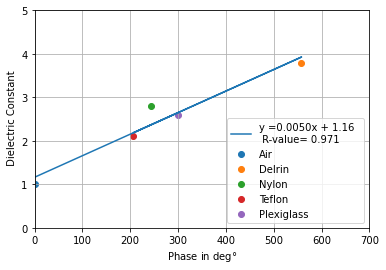

In [9]:
m, b, r_value, p_value, std_err = stats.linregress(phase, dielectric_constant)
print(" Slope = {0:.4f} \n intecept = {1:.2f} \n R-value = {2:.3f} \n STD error = {3: .3f} ".format(m,b,r_value,std_err))
for index, typ in enumerate(df.columns):
    plt.scatter(phase[index], dielectric_constant[index], label=typ)
plt.plot(phase, m*phase + b, label = 'y ={0:.4f}x + {1:.2f}  \n R-value= {2:.3f}'.format(m,b, r_value))
plt.xlabel('Phase in deg$\degree$')
plt.ylabel(' Dielectric Constant')
plt.ylim(0,5)
plt.xlim(0,700)
plt.grid(True)
plt.legend()

In [15]:
df_trans.to_csv("Dielectric Constant Data.csv", index=True)